# Linear Regression

\begin{equation}
Y_i = \beta_1 + \beta_2 X_i
\end{equation}

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [17]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

salary = pd.read_csv(url, sep='\t')
salary.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


$Y_i$ is each observation

in the graph below, it's represented by the points

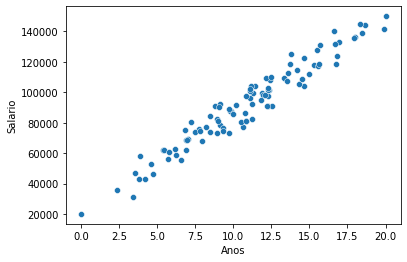

In [18]:
sns.scatterplot(x='Anos', y='Salario',
                data=salary);

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$


$\hat{Y}_i$ is the prediction

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [19]:
X = sm.add_constant(salary['Anos'])

X.head()

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628


In [20]:
Y = salary['Salario']

In [21]:
regression_result = sm.OLS(Y, X).fit()

regression_result.params

const    22755.182146
Anos      6367.639175
dtype: float64

- These numbers represent the linear coeficient ($\beta_1$) and the angular coeficient ($\beta_2$), respectively

 

In [22]:
beta_1 = regression_result.params[0]
beta_2 = regression_result.params[1]

## Confidence interval

The confidence interval proposes a range of plausible values for an unknown parameter. The confidence interval has an associated confidence level. The default confidence level is 95%.

A confidence level of 95% means that 95% of the calculated confidence intervals will contain the desired parameter.



In [23]:
regression_result.conf_int()

,0,1
const,19067.657980,26442.706312
Anos,6050.119397,6685.158952


## Prediction

In [24]:
salary['y_predicted'] = regression_result.predict()

salary.head()

,Anos,Salario,y_predicted
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594


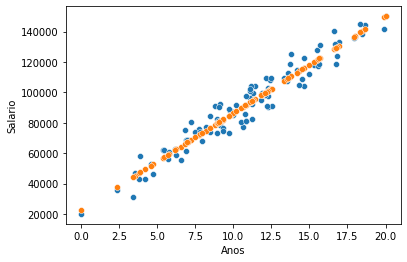

In [26]:
sns.scatterplot(data=salary, x='Anos', y='Salario')
sns.scatterplot(data=salary, x='Anos', y='y_predicted');

In [28]:
X_new = np.linspace(20,30,11)

X_new = sm.add_constant(X_new)

In [29]:
X_new_prediction = regression_result.predict(X_new)

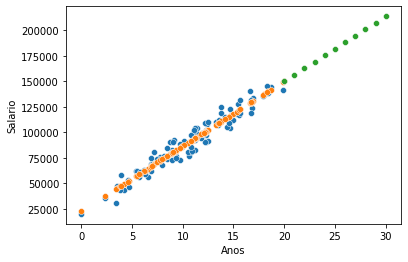

In [31]:
sns.scatterplot(data=salary, x='Anos', y='Salario')
sns.scatterplot(data=salary, x='Anos', y='y_predicted')
sns.scatterplot(x=X_new[:,1], y=X_new_prediction);